# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy.stats import kde

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


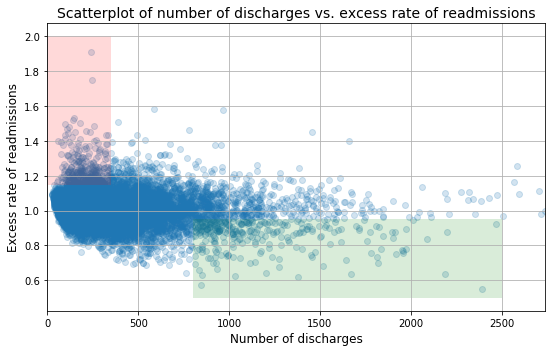

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A

I don't agree with the above analysis and recommendations. 

In the plot it is clear that there is a higher rate of readmission for a segment of the hospitals with low number of discharges. It is not clear though that the green area differs a lot from the top area of the plot for the same range of number of discharges. Highlighting the green area is misleading for the reader.

Because of the red area, it looks like the overall the rate of readmissions is trending down with increasing number of discharges.

The plot does not indicate a strong negative correlation between the variables. I would not state that there is significant correlation. This would be confirmed or rejected when the Pearson coefficient is computed.

The first recommendation refers to hospitals with less than 300 discharges, but the statistics have been computed for hospitals with less than 100. Statistics should support the recommendations.

I don't agree with the recommendations since they are based on poor statistics. They are just computed based on observed values and they don't provide margins of error or confidence intervals. Also, it seems that the cut for low number of discharges is arbitrary. I would recommend studying other factors that could be affecting this segment of hospitals with high excess readmission rate and low discharge number (red area) before deciding to reduce the amount of small hospitals.

In [5]:
#Create dataframe with clean data
df = pd.DataFrame({'number_discharges' : x, 'excess_readm_rate': y})

In [6]:
#Compute mean excess readmission rate 
#in hospitals/facilities with number of discharges < 100
df[df.number_discharges<100].excess_readm_rate.mean()

1.0226183501683506

In [7]:
#Compute % hospitals with excess rate above 1 in hospitals/facilities with number of discharges < 100
hosp_low_disc_above_1=df[(df.number_discharges<100) & (df.excess_readm_rate>1)].number_discharges.count()
total_hosp_low_discharge=df[df.number_discharges<100].number_discharges.count()
ratio_low_above_1=hosp_low_disc_above_1/total_hosp_low_discharge

#print result
print(ratio_low_above_1)

0.6321548821548821


In [8]:
#Compute mean excess readmission rate 
#in hospitals/facilities with number of discharges > 1000
df[df.number_discharges>1000].excess_readm_rate.mean()

0.9790730434782613

In [9]:
#Compute % hospitals with excess rate above 1 
#in hospitals/facilities with number of discharges > 1000
hosp_high_disc_above_1=df[(df.number_discharges>1000) & (df.excess_readm_rate>1)].number_discharges.count()
total_hosp_high_discharge=df[df.number_discharges>1000].number_discharges.count()
ratio_high_above_1=hosp_high_disc_above_1/total_hosp_high_discharge

#print result
print(ratio_high_above_1)

0.44565217391304346


The statistics computed in the report are correct based on the observed values, but it would be more proper to include as well the margin of error.

In [10]:
#Compute linear regression
slope, intercept= np.polyfit(x,y,1)
x_reg=np.array([0,3000])
y_reg=intercept+slope*x_reg

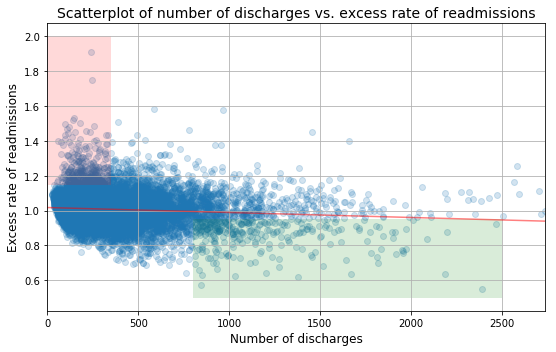

In [11]:
#Add linear regression to original plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.plot(x_reg,y_reg, color='red', alpha=0.5)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

Based on the linear regression we see that overall the rate of readmissions is trending down with increasing number of discharges.

In [12]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [13]:
r_obs=pearson_r(x,y)
print(r_obs)

-0.09309554287590442


Since the correlation factor is below 0.3, we can say that the correlation is week. The conclusion from the report is not right.

### B.1

The null hypothesis proposed is: there is no correlation between the number of discharges and the excess rate of readmission.

H0: ρ=0
Ha: ρ≠0

Our test statistic is the pearson correlation ρ

### B.2

In [14]:
r_obs=pearson_r(x,y)
print(r_obs)

-0.09309554287590442


In [15]:
#Initiate permutation replicates: perm_replicates
perm_replicates=np.empty(10000)

#Generate replicates
for i in range(10000):
    #Permute number of discharges (x): num_discharges_permuted
    num_discharges_permuted=np.random.permutation(x)
    
    #Compute Pearson correlation
    perm_replicates[i]=pearson_r(num_discharges_permuted,y)

#Compute p-value: p
p=np.sum(perm_replicates>=r_obs)/len(perm_replicates)
print("p-value: ",p)

p-value:  1.0


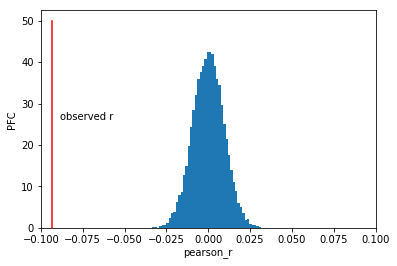

In [16]:
#Plot permutation replicates
_= plt.hist(perm_replicates, bins=50, density=True)

#Plot observed person correlation
_= plt.plot(np.array([r_obs,r_obs]),np.array([0,50]), color='red')

#Add labels
_= plt.xlim((-0.1, 0.1))
_= plt.ylabel('PFC')
_= plt.xlabel('pearson_r')
_= plt.figtext(.17, .5, "observed r")

#Display plot
plt.show()

The p_value is really high. It is very unlikely that assuming there is no correlation between the variables we see such a small correlation factor as the one observed. Therefore we reject the null hypothesis in favor of the alternative hypothesis.

### B.3

For a two tailed test with a statistical significance for α=.01, we will reject the null hypothesis if p-value is smaller than 0.005 or greater than 0.995. 

Since the p-value computed is close to 1, we conclude that the difference between the observed correlation and the hypothesis value 0 is statiscally significant and therefore we reject the null hypothesis at 0.01 significance level.

### B.4

Statistical significance does not tell us in which measure the difference between the hypothesis value and the observed one is relevant for practical purposes. 

If the sample size is really large, we might conclude that the differences are statistically significant but that small difference between both might be meaningless in the context of the problem. 

Let's say we are running and A/B test. Variant A has a conversion rate of 50% and variant B has a conversion 50.02%. Because we let the experiment run for more than 2 months, we found that the difference is statistically significant. This small improvement probabily is not worth the expense of the development to implement it. 

For practical purposes is better to compute a confidence interval. 

In [17]:
#Compute confidence interval of permutation replicates for α=.01 
CI=np.percentile(perm_replicates,[0.5,99.5])
print('Confidence interval for Pearson correlation assuming no correlation between the variables: ', CI)

Confidence interval for Pearson correlation assuming no correlation between the variables:  [-0.02345946  0.0241722 ]


In [18]:
#Compute difference between observed r and confidence interval
print('Difference between observed value and confidence interval assuming null hypothesis is true: ', r_obs-CI)

Difference between observed value and confidence interval assuming null hypothesis is true:  [-0.06963608 -0.11726774]


The difference between the observed value and the confidence interval values is in the same order of magnitude as the observed correlation. Therefore, here both practical significance and statistical significant lead to the same conclusions. 

### B.5

Advantages of using scatterplot:
    - They help indentify trends and look for correlation in data
    - Outliers are clearly spotted
    - Big amount of data can be displayed
Disadvantages of using scatterplot:
    - In areas where there are many data points, because of the overlap of points, it is unclear how large the set is.

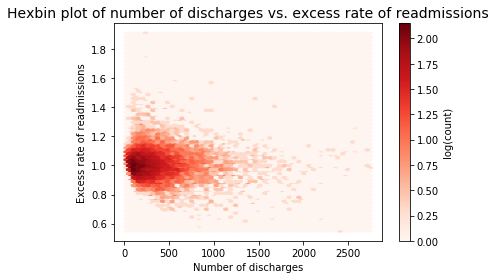

In [20]:
# Make the plot
plt.hexbin(x, y, gridsize=(50,50),cmap=plt.cm.Reds, bins='log')
plt.colorbar(label='log(count)')
plt.ylabel('Excess rate of readmissions')
plt.xlabel('Number of discharges')
plt.title('Hexbin plot of number of discharges vs. excess rate of readmissions', fontsize=14)

#Print plot
plt.show()

#### Conclusions

Based on our hypothesis test, we can say there is a week negative correlation between the excess readmission rate and the number of discharges.

We recommend to evaluate factors, other than number of discharges, that could be causing higher excess readmission rate in the red area segment before requiring all small hospitals to demonstrate upgraded resource allocation for quality care to continue operation or
establishing measurements to reduce the amount of hospitals by consolidating higher capacity ones.